# Portafolio de Estrategias

¿Que es un portafolio de Estrategias?

¿Como se construye?

¿Para que sirve?



¿Cual es la principal ventaja contra un portafolio de acciones?

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

pd.options.display.max_columns = 12

df = yf.download('KO', auto_adjust=True, start='2017-01-01')

fast, slow = 5, 50
df['Cruce'] = df.Close.rolling(fast).mean() / df.Close.rolling(slow).mean() 
df['Estado'] = np.where(df.Cruce.shift() > 1.02 , 'Comprado', np.where(df.Cruce.shift() < 0.98, 'Vendido', 'Neutral'))
df['logDR'] = np.log(df.Close/df.Close.shift()) * 100
df['Estrategia'] = np.where(df.Estado=='Comprado', df.logDR , np.where( df.Estado=='Vendido' , -df.logDR  , 0 ) )
df = df.dropna().round(4)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,Cruce,Estado,logDR,Estrategia
Date,,,,,,,,,
2017-03-15,37.41,37.67,37.40,37.53,22757800,1.0174,Neutral,0.3470,0.0000
2017-03-16,37.45,37.77,37.34,37.65,16004200,1.0198,Neutral,0.3192,0.0000
2017-03-17,37.67,37.74,37.43,37.45,37526500,1.0200,Neutral,-0.5326,0.0000
2017-03-20,37.51,37.73,37.49,37.59,11484200,1.0204,Comprado,0.3731,0.3731
2017-03-21,37.70,37.99,37.61,37.87,17187300,1.0224,Comprado,0.7421,0.7421
...,...,...,...,...,...,...,...,...,...
2020-09-28,49.31,49.71,49.14,49.28,11215700,1.0107,Neutral,1.1429,0.0000
2020-09-29,49.39,49.56,48.91,48.92,12426600,1.0063,Neutral,-0.7332,0.0000
2020-09-30,49.27,49.62,48.89,49.37,15755900,1.0101,Neutral,0.9157,0.0000


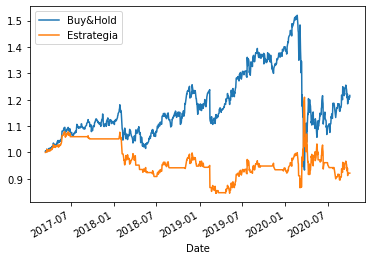

In [2]:
portafolio = pd.DataFrame(index=df.index)

portafolio['Buy&Hold'] = (df.logDR/100 + 1).cumprod()
portafolio['Estrategia'] = (df.Estrategia/100 + 1).cumprod()
portafolio.plot()

In [3]:
portafolio

,Buy&Hold,Estrategia
Date,,
2017-03-15,1.003470,1.000000
2017-03-16,1.006673,1.000000
2017-03-17,1.001312,1.000000
2017-03-20,1.005047,1.003731
2017-03-21,1.012506,1.011180
...,...,...
2020-09-28,1.210359,0.921435
2020-09-29,1.201484,0.921435
2020-09-30,1.212486,0.921435


In [4]:
df = yf.download('KO', auto_adjust=True, start='2017-01-01')

fast_1, slow_1 = 5, 20
fast_2, slow_2 = 20, 100

df['logDR'] = np.log(df.Close/df.Close.shift()) * 100

df['Cruce_1'] = df.Close.rolling(fast_1).mean() / df.Close.rolling(slow_1).mean() 
df['Estado_1'] = np.where(df.Cruce_1.shift() > 1.02 , 'Comprado', np.where(df.Cruce_1.shift() < 0.98, 'Vendido', 'Neutral'))
df['Estrategia_1'] = np.where(df.Estado_1=='Comprado', df.logDR, np.where( df.Estado_1=='Vendido' , -df.logDR  , 0 ) )

df['Cruce_2'] = df.Close.rolling(fast_2).mean() / df.Close.rolling(slow_2).mean() 
df['Estado_2'] = np.where(df.Cruce_2.shift() > 1.02 , 'Comprado', np.where(df.Cruce_2.shift() < 0.98, 'Vendido', 'Neutral'))
df['Estrategia_2'] = np.where(df.Estado_2=='Comprado', df.logDR, np.where( df.Estado_2=='Vendido' , -df.logDR  , 0 ) )

df = df.dropna().round(4)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,logDR,Cruce_1,Estado_1,Estrategia_1,Cruce_2,Estado_2,Estrategia_2
Date,,,,,,,,,,,,
2017-05-25,40.10,40.53,40.07,40.46,16704200,0.8190,1.0169,Neutral,0.0000,1.0393,Neutral,0.0000
2017-05-26,40.41,40.60,40.39,40.45,11341400,-0.0247,1.0211,Neutral,0.0000,1.0410,Comprado,-0.0247
2017-05-30,40.24,40.51,40.20,40.48,13093500,0.0741,1.0242,Comprado,0.0741,1.0426,Comprado,0.0741
2017-05-31,40.48,40.72,40.43,40.52,14148000,0.0988,1.0266,Comprado,0.0988,1.0441,Comprado,0.0988
2017-06-01,40.50,40.80,40.30,40.80,11049300,0.6886,1.0272,Comprado,0.6886,1.0459,Comprado,0.6886
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,49.31,49.71,49.14,49.28,11215700,1.1429,0.9822,Neutral,0.0000,1.0633,Comprado,1.1429
2020-09-29,49.39,49.56,48.91,48.92,12426600,-0.7332,0.9794,Neutral,0.0000,1.0619,Comprado,-0.7332
2020-09-30,49.27,49.62,48.89,49.37,15755900,0.9157,0.9835,Vendido,-0.9157,1.0617,Comprado,0.9157


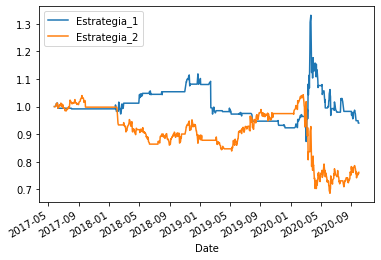

In [5]:
portafolio = pd.DataFrame(index=df.index)

portafolio['Estrategia_1'] = (df.Estrategia_1/100 + 1).cumprod()
portafolio['Estrategia_2'] = (df.Estrategia_2/100 + 1).cumprod()
#portafolio['Buy&Hold'] = (df.logDR/100 + 1).cumprod()

portafolio.plot()


# Analisis Combinatorio

* Combinaciones (No importa el orden  AB es la misma combinacion que BA)
    * Con repeticion
    * Sin repeticion
* Permutaciones (Importa el orden  AB es una permutacion y BA es otra permutacion )

### Combinatoria

Combinaciones de "n" elelmentos tomados de a "i"

$$ \large  C \binom{n}{i} = \frac{n!}{i! (n-i)!} $$

In [6]:
import math

# Combinaciones de 10 tomados de a 2
c = math.factorial(10) / (math.factorial(2)*math.factorial(10-2))

c

45.0

### Algos de Combinatoria

In [7]:
numeros = [i for i in range(10)]

combinaciones = []
for i in range(len(numeros)):
    for j in range(len(numeros)):
        if j>i:
            combinaciones.append([numeros[i],numeros[j]])

print(len(combinaciones), '\n\n', combinaciones)

45 

 [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [5, 6], [5, 7], [5, 8], [5, 9], [6, 7], [6, 8], [6, 9], [7, 8], [7, 9], [8, 9]]


### Y para que demonios voy a querer algos de combinatoria?

Escucho ideas...

* Screener
* Clusterizacion
* Parametrizaciones
* Combinaciones de indicadores o ratios

* Combinaciones de conjuntos discretizables

In [8]:
activos = ["GGAL", "PAM","TGS","YPF","EDN"]

combinaciones = []
for i in range(len(activos)):
    for j in range(len(activos)):
        if j>i:
            combinaciones.append([activos[i],activos[j]])
            
combinaciones

[['GGAL', 'PAM'],
 ['GGAL', 'TGS'],
 ['GGAL', 'YPF'],
 ['GGAL', 'EDN'],
 ['PAM', 'TGS'],
 ['PAM', 'YPF'],
 ['PAM', 'EDN'],
 ['TGS', 'YPF'],
 ['TGS', 'EDN'],
 ['YPF', 'EDN']]

In [9]:
import itertools as it

list(it.combinations(activos,2))

[('GGAL', 'PAM'),
 ('GGAL', 'TGS'),
 ('GGAL', 'YPF'),
 ('GGAL', 'EDN'),
 ('PAM', 'TGS'),
 ('PAM', 'YPF'),
 ('PAM', 'EDN'),
 ('TGS', 'YPF'),
 ('TGS', 'EDN'),
 ('YPF', 'EDN')]

In [10]:
[comb for comb in it.combinations(activos,2) ]

[('GGAL', 'PAM'),
 ('GGAL', 'TGS'),
 ('GGAL', 'YPF'),
 ('GGAL', 'EDN'),
 ('PAM', 'TGS'),
 ('PAM', 'YPF'),
 ('PAM', 'EDN'),
 ('TGS', 'YPF'),
 ('TGS', 'EDN'),
 ('YPF', 'EDN')]

# MPT

## Algunas cositas previas

### Importacion de datos 

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

data = yf.download(['AMZN','TSLA','NFLX','SQQQ'], start='2000-01-01', end='2021-01-01')['Adj Close']
data.head()

[*********************100%***********************]  4 of 4 downloaded


,AMZN,NFLX,SQQQ,TSLA
Date,,,,
2000-01-03,89.38,NaN,NaN,NaN
2000-01-04,81.94,NaN,NaN,NaN
2000-01-05,69.75,NaN,NaN,NaN
2000-01-06,65.56,NaN,NaN,NaN
2000-01-07,69.56,NaN,NaN,NaN


### Filtrado de los ceros

In [12]:
lista = [0,12,13,14]
lista2 = [1,2,3,4]
df = pd.DataFrame(list(zip(lista,lista2)), columns=['a','b'])
df

,a,b
0,0,1
1,12,2
2,13,3
3,14,4


In [13]:
df_ceros = df.loc[(df==0).any(axis=1)]
df_ceros

,a,b
0,0,1


In [14]:
df_sin_ceros = df.loc[~(df==0).any(axis=1)]
df_sin_ceros

,a,b
1,12,2
2,13,3
3,14,4


In [15]:
lista = [0,12,13,14]
lista2 = [1,2,3,4]
df = pd.DataFrame(list(zip(lista,lista2)), columns=['a','b'])

df.loc[df.a!=0]

,a,b
1,12,2
2,13,3
3,14,4


In [16]:
lista = [0,12,13,14]
lista2 = [1,2,3,4]
df = pd.DataFrame(list(zip(lista,lista2)), columns=['a','b'])

df.loc[:, (df != 0).all(axis=0)]

,b
0,1
1,2
2,3
3,4


### Retornos logaritmicos

In [17]:
retornos = np.log((data/data.shift(1)).dropna())*100
retornos.head()

,AMZN,NFLX,SQQQ,TSLA
Date,,,,
2010-06-30,0.596688,-3.544675,4.790663,-0.209424
2010-07-01,1.543941,0.961854,0.942195,-8.301708
2010-07-02,-1.653831,-2.389523,0.824100,-13.385686
2010-07-06,0.839421,0.130634,-0.934471,-17.609101
2010-07-07,3.016023,9.992803,-9.934987,-1.880933


In [18]:
retornos.cov()

,AMZN,NFLX,SQQQ,TSLA
AMZN,3.910990,2.592558,-4.889842,2.237344
NFLX,2.592558,10.421225,-4.903837,2.882903
SQQQ,-4.889842,-4.903837,13.257056,-5.703496
TSLA,2.237344,2.882903,-5.703496,12.489576


In [19]:
retornos.corr()

,AMZN,NFLX,SQQQ,TSLA
AMZN,1.000000,0.406093,-0.679091,0.320122
NFLX,0.406093,1.000000,-0.417208,0.252695
SQQQ,-0.679091,-0.417208,1.000000,-0.443245
TSLA,0.320122,0.252695,-0.443245,1.000000


### Ponderaciones al azar

In [20]:
p = np.array([0.8, 0.9, 0.5, 0.6])
suma = sum(p)
p/suma

array([0.28571429, 0.32142857, 0.17857143, 0.21428571])

In [21]:
np.random.seed(1)

pond = np.array(np.random.random(len(data.columns)))
pond = pond/np.sum(pond)
pond

array([2.89640161e-01, 5.00297106e-01, 7.94383512e-05, 2.09983296e-01])

### Explicación de MPT

https://en.wikipedia.org/wiki/Modern_portfolio_theory

$$ \Large R_{p} = \sum _{i} w_{i} R_{i}\quad $$

$$ \Large \sigma _{p}^{2}=\sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} $$

### Cálculo de sharpe de cartera

In [22]:
r={}

r['retorno'] = np.sum( (retornos.mean() * pond * 252))

r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))

r['sharpe'] = r['retorno'] / r['volatilidad'] 
r['ponderaciones'] = pond.round(2)
r

{'retorno': 35.44609318940535,
 'volatilidad': 35.90456045074789,
 'sharpe': 0.9872309462757123,
 'ponderaciones': array([0.29, 0.5 , 0.  , 0.21])}

### Doble producto matricial ponderaciones por mat_covarianzas

In [64]:
mat_cov = (np.random.rand(3,3)*10).round()
mat_cov

array([[6., 5., 1.],
       [4., 7., 2.],
       [6., 2., 8.]])

In [24]:
p  = [1,2,0]

pm1 = np.dot(mat_cov,p)
pm1

array([ 3., 11., 18.])

In [25]:
pm2 = np.dot(p,pm1)
pm2

25.0

# Markowitz - I

In [26]:
import yfinance as yf
import pandas as pd

df = yf.download(['PYPL','AAPL'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
retornos = np.log((df/df.shift(1)).dropna())

[*********************100%***********************]  2 of 2 downloaded


In [27]:
datosTickers = []
for ticker in df.columns:
    d = {}
    d['ticker'] = ticker
    d['retorno'] = retornos[ticker].mean() * 252
    d['volatilidad'] = retornos[ticker].std() * (252**0.5)
    d['sharpe'] = d['retorno'] / d['volatilidad']
    datosTickers.append(d)
    
    
datosTickers = pd.DataFrame(datosTickers).set_index('ticker')
datosTickers

,retorno,volatilidad,sharpe
ticker,,,
AAPL,0.260083,0.300078,0.866717
PYPL,0.315411,0.336027,0.938646


In [28]:
q = 500
retornos = np.log((df/df.shift(1)).dropna())
carteras = [] 

for i in range(q):
    pond = np.array(np.random.random(len(df.columns)))
    pond = pond/np.sum(pond)
    r={}
    r['retorno'] = np.sum( (retornos.mean() * pond * 252))
    r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
    r['sharpe'] = r['retorno'] / r['volatilidad'] 
    r['pesos'] = pond.round(4)
    carteras.append(r)

carteras = pd.DataFrame(carteras)
carteras

,retorno,volatilidad,sharpe,pesos
0,0.261756,0.297164,0.880849,"[0.9698, 0.0302]"
1,0.281308,0.281444,0.999517,"[0.6164, 0.3836]"
2,0.271194,0.285185,0.950941,"[0.7992, 0.2008]"
3,0.304438,0.308535,0.986718,"[0.1983, 0.8017]"
4,0.273613,0.283406,0.965444,"[0.7555, 0.2445]"
...,...,...,...,...
495,0.281165,0.281429,0.999061,"[0.619, 0.381]"
496,0.269180,0.287078,0.937656,"[0.8356, 0.1644]"
497,0.265804,0.291073,0.913184,"[0.8966, 0.1034]"
498,0.287270,0.283828,1.012128,"[0.5086, 0.4914]"


In [29]:
optimo = carteras.loc[carteras.sharpe.idxmax()]
mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']

datosTickers['ponderacion_optima'] = mejor_port
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
AAPL,0.260083,0.300078,0.866717,0.4511
PYPL,0.315411,0.336027,0.938646,0.5489


In [30]:
optimo

retorno                0.290451
volatilidad             0.28647
sharpe                   1.0139
pesos          [0.4511, 0.5489]
Name: 33, dtype: object

In [31]:
mejor_port

array([0.4511, 0.5489])

In [32]:
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
AAPL,0.260083,0.300078,0.866717,0.4511
PYPL,0.315411,0.336027,0.938646,0.5489


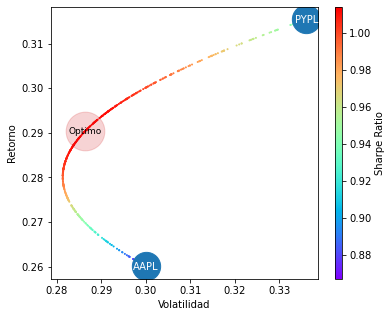

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
plt.colorbar(label='Sharpe Ratio', aspect=40)
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 

for ticker in df.columns:
    vol = datosTickers.loc[ticker,'volatilidad'] 
    ret = datosTickers.loc[ticker,'retorno'] 
    plt.scatter(vol, ret,  c='tab:blue', s=800) 
    plt.text(vol, ret, ticker, c='w', ha='center', va='center') 

In [34]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt

def markowitz(data, q=1000):
    retornos = np.log((data/data.shift(1)).dropna())
    carteras, datosTickers = [] , []
    
    for i in range(q):
        pond = np.array(np.random.random(len(data.columns)))
        pond = pond/np.sum(pond)
        r={}
        r['retorno'] = np.sum( (retornos.mean() * pond * 252))
        r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
        r['sharpe'] = r['retorno'] / r['volatilidad'] 
        r['pesos'] =  pond.round(4)
        carteras.append(r)
    
    for ticker in data.columns:
        d = {}
        d['ticker'] = ticker
        d['retorno'] = retornos[ticker].mean() * 252
        d['volatilidad'] = retornos[ticker].std() * (252**0.5)
        d['sharpe'] = d['retorno'] / d['volatilidad']
        datosTickers.append(d)

    datosTickers = pd.DataFrame(datosTickers).set_index('ticker')    
    carteras = pd.DataFrame(carteras)

    optimo = carteras.loc[carteras.sharpe.idxmax()]
    mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']
    datosTickers['ponderacion_optima'] = mejor_port

    plt.figure(figsize=(6,5))
    plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
    plt.colorbar(label='Sharpe Ratio', aspect=40)
    plt.xlabel('Volatilidad')
    plt.ylabel('Retorno')
    plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
    plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 
       
    for ticker in data.columns:
        vol = datosTickers.loc[ticker,'volatilidad'] 
        ret = datosTickers.loc[ticker,'retorno'] 
        plt.scatter(vol, ret,  c='tab:blue', s=800) 
        plt.text(vol, ret, ticker, c='w', ha='center', va='center') 
    
    return(datosTickers.round(3), optimo)

[*********************100%***********************]  2 of 2 downloaded
        retorno  volatilidad  sharpe  ponderacion_optima
ticker                                                  
AAPL      0.260        0.300   0.867                0.45
PYPL      0.315        0.336   0.939                0.55

Portafolio Optimo:
retorno                0.290548
volatilidad            0.286558
sharpe                  1.01392
pesos          [0.4495, 0.5505]
Name: 903, dtype: object


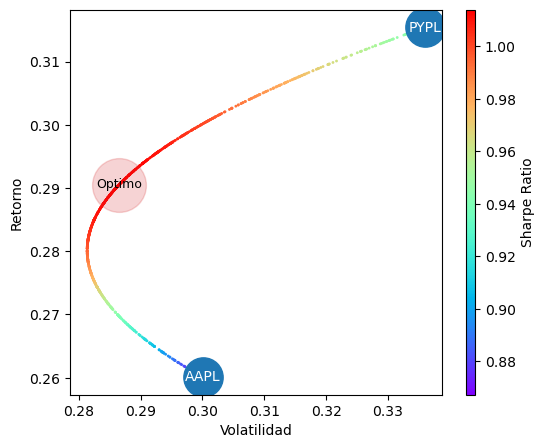

In [35]:
plt.style.use('default')
df = yf.download(['PYPL','AAPL'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
pond, optimo = markowitz(df, q=1000)
print(pond, '\n\nPortafolio Optimo:\n',optimo, sep='')

# Markowitz - Optimo varios activos

Buscamos el portafolio optimo entre muchos portafolios posibles

In [43]:
import yfinance as yf, numpy as np, pandas as pd, random, tqdm


# Obtengo el listado de tickers del sp500
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e for e in sp500_tickers if e not in ('BRK.B','BF.B')]


# Obtengo todos los historicos
data_sp500 = yf.download(sp500_tickers, start='2018-01-01', end='2021-01-01')['Adj Close']

# Para evitar tickers con poco historial
conteo = pd.DataFrame(data_sp500.count(), columns=['Q'])
sp500_tickers = list(conteo.loc[conteo.Q>500].index)


pd.options.display.max_columns = 6
pd.options.display.max_rows = 10
pd.options.display.width = 800 
print(data_sp500)

[*********************100%***********************]  503 of 503 downloaded
                 A    AAL     AAP  ...    ZBRA   ZION     ZTS
Date                               ...                       
2018-01-02   66.10  51.65  104.92  ...  103.71  47.00   70.58
2018-01-03   67.79  51.01  105.87  ...  105.77  46.95   70.90
2018-01-04   67.28  51.34  109.77  ...  107.86  47.14   71.32
2018-01-05   68.35  51.32  110.94  ...  109.54  47.16   72.14
2018-01-08   68.50  50.81  110.16  ...  110.63  46.93   73.01
...            ...    ...     ...  ...     ...    ...     ...
2020-09-28   99.51  12.76  153.39  ...  260.56  29.38  161.32
2020-09-29  100.22  12.25  151.71  ...  258.92  28.97  162.48
2020-09-30  100.94  12.29  153.50  ...  252.46  29.22  165.37
2020-10-01  101.22  12.58  154.85  ...  258.48  29.12  164.03
2020-10-02   99.96  13.00  155.60  ...  258.81  29.85  163.42

[695 rows x 503 columns]


In [44]:
def simular(tickers, q):
    
    n_stocks = 3
    datos = []
    for i in tqdm.tqdm(range(q)):
    
        muestra = data_sp500[random.sample(tickers, n_stocks)]
        
        # Filtro sin ceros
        muestra = muestra.loc[:, (muestra != 0).all(axis=0)]
        retornos = np.log((muestra/muestra.shift(1)).dropna())
        pond = np.array(np.random.random(len(muestra.columns)))
        pond = pond/np.sum(pond)
        
        # If para evitar activos sin dataFeed
        if len(retornos):    
            r={}
            r['activos'] = list(muestra.columns)
            r['pesos'] = pond.round(3)
            r['retorno'] = np.sum( (retornos.mean() * pond * 252))
            r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
            r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
            datos.append(r)
    
    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)

    return df

In [45]:
portfolios = simular(sp500_tickers, 10000)
print('\n',portfolios.head(10))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:13<00:00, 135.83it/s]


                  activos                  pesos   retorno  volatilidad  sharpe
0       [MKTX, CMG, PHM]  [0.503, 0.485, 0.012]  0.419417     0.303446   1.382
3526    [ANSS, WST, TGT]  [0.113, 0.568, 0.319]  0.353140     0.255812   1.380
6954     [ROL, UAL, CMG]   [0.453, 0.027, 0.52]  0.375421     0.281430   1.334
7732  [PAYC, TWTR, DXCM]  [0.471, 0.122, 0.407]  0.545778     0.410382   1.330
8275    [TSCO, AMD, MKC]  [0.347, 0.206, 0.447]  0.345801     0.267689   1.292
4337     [DE, DXCM, LYB]  [0.041, 0.856, 0.103]  0.588342     0.457395   1.286
8306   [CTLT, HCA, DXCM]  [0.263, 0.139, 0.598]  0.499275     0.388457   1.285
3560     [AMD, RMD, ZTS]  [0.311, 0.336, 0.353]  0.420891     0.330046   1.275
5360    [PEP, ETR, DXCM]  [0.055, 0.398, 0.548]  0.429102     0.339411   1.264
4663    [STX, CMG, SNPS]  [0.161, 0.437, 0.402]  0.376091     0.298716   1.259


In [61]:
import sys

def simular2(tickers, q):
    
    n_stocks = 3
    datos = []

    with tqdm.tqdm(total=q, file=sys.stdout) as pbar:
        for i in range(q):
            pbar.update()

            muestra = data_sp500[random.sample(tickers, n_stocks)]

            # Filtro sin ceros
            muestra = muestra.loc[:, (muestra != 0).all(axis=0)]
            retornos = np.log((muestra/muestra.shift(1)).dropna())
            pond = np.array(np.random.random(len(muestra.columns)))
            pond = pond/np.sum(pond)

            # If para evitar activos sin dataFeed
            if len(retornos):    
                r={}
                r['activos'] = list(muestra.columns)
                r['pesos'] = pond.round(3)
                r['retorno'] = np.sum( (retornos.mean() * pond * 252))
                r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
                r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
                datos.append(r)
    
    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)

    return df

In [62]:
portfolios = simular2(sp500_tickers, 10000)
print('\n',portfolios.head(10))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:10<00:00, 141.92it/s]

                  activos                  pesos   retorno  volatilidad  sharpe
9926   [HRL, DXCM, CHTR]  [0.231, 0.562, 0.207]  0.456892     0.324343   1.409
675    [DXCM, PGR, AMGN]  [0.693, 0.245, 0.062]  0.539455     0.388475   1.389
1615  [PYPL, DXCM, PAYC]   [0.034, 0.876, 0.09]  0.656974     0.475420   1.382
6733   [GOOGL, TT, DXCM]  [0.113, 0.361, 0.526]  0.457213     0.334862   1.365
4066   [DXCM, MSFT, MCD]   [0.442, 0.338, 0.22]  0.439743     0.322543   1.363
5334    [DXCM, KEYS, VZ]  [0.409, 0.487, 0.104]  0.439275     0.326908   1.344
1775     [AMD, WAT, CMG]   [0.37, 0.221, 0.409]  0.486093     0.363351   1.338
8670   [DXCM, MSFT, OMC]  [0.741, 0.153, 0.106]  0.548213     0.411156   1.333
2509   [DXCM, GOOG, APD]  [0.809, 0.138, 0.054]  0.581376     0.439008   1.324
5752     [NOW, KMB, AMD]  [0.393, 0.175, 0.432]  0.516773     0.391479   1.320


# Markowitz - Optimizcion x Optimo varios activos

Optimmizamos las iteraciones para encontrar un optimo mas rapido

In [46]:
def simular3(tickers, q):
    n_stocks = 3
    datos = []
    for i in range(q):
    
        muestra = data_sp500[random.sample(tickers, n_stocks)]
        
        # Filtro sin ceros
        muestra = muestra.loc[:, (muestra != 0).all(axis=0)]
        retornos = np.log((muestra/muestra.shift(1)).dropna())
        pond = np.array(np.random.random(len(muestra.columns)))
        pond = pond/np.sum(pond)
        
        # If para evitar activos sin dataFeed
        if len(retornos):    
            r={}
            r['activos'] = list(muestra.columns)
            r['pesos'] = pond.round(3)
            r['retorno'] = np.sum( (retornos.mean() * pond * 252))
            r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
            r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
            datos.append(r)
            
    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)
    return df

In [47]:
%%time
q_inicial = 1500
lista_tickers = sp500_tickers
portfolios = simular3(lista_tickers, q_inicial)

best = pd.DataFrame()
for i in tqdm.tqdm(range(10)):
    top = portfolios.iloc[ : int(200/(i+1))]
    
    lista_tickers = list(np.array(top.activos.apply(pd.Series).stack()))
        
    portfolios = simular3(lista_tickers, int(q_inicial/(i+1)))
    
    best = pd.concat([best,portfolios.iloc[:10]])

print('Mejores\n',best.sort_values('sharpe', ascending=False).head(10))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.82s/it]

Mejores
              activos                  pesos   retorno  volatilidad  sharpe
53   [DXCM, DG, CMG]   [0.305, 0.415, 0.28]  0.479783     0.274763   1.746
83   [DG, CMG, DXCM]  [0.465, 0.269, 0.266]  0.461961     0.264816   1.744
251  [DXCM, CMG, DG]  [0.312, 0.331, 0.357]  0.494140     0.283325   1.744
33   [DXCM, DG, CMG]  [0.228, 0.441, 0.332]  0.461565     0.264823   1.743
73   [CMG, DG, DXCM]  [0.262, 0.477, 0.261]  0.458377     0.263089   1.742
239  [DXCM, DG, CMG]     [0.22, 0.47, 0.31]  0.453696     0.260746   1.740
75   [DG, DXCM, CMG]  [0.381, 0.237, 0.382]  0.476992     0.274414   1.738
139  [CMG, DG, DXCM]  [0.376, 0.396, 0.228]  0.471887     0.271516   1.738
183  [DXCM, DG, CMG]   [0.229, 0.39, 0.381]  0.473622     0.272644   1.737
83   [DXCM, CMG, DG]   [0.307, 0.373, 0.32]  0.502169     0.289116   1.737
Wall time: 40.4 s
